In [1]:
import torch

from dataset import Dataset
ds = Dataset(file_path='./data', window_size = 20, test_size = 1000)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.41it/s]


In [2]:
test_features, test_labels = ds.get_test_dataset()
print(test_features.shape, test_labels.shape)

torch.Size([980, 20, 23]) torch.Size([980, 3])


In [3]:
from torch.utils.data import DataLoader, TensorDataset
test_dataset = TensorDataset(test_features, test_labels)

In [4]:
BATCH_SIZE = 30
test_loader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = False)

In [5]:
from model import Model

model = Model(input_size = test_features.shape[2], recurrent_hidden_size = 128, dense_hidden_size = 256, output_size = 3)
device = torch.device('cpu')
model.load_state_dict(torch.load('model.pt', map_location=device))
model.eval()

Model(
  (gru): GRU(23, 128, num_layers=2, batch_first=True, bidirectional=True)
  (dense1): Linear(in_features=256, out_features=256, bias=True)
  (dense2): Linear(in_features=256, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=False)
)

In [6]:
pred = model(test_features).detach().numpy()
print(pred)

[[ 1.0633827e-03 -8.5124094e-04 -1.5023351e-03]
 [ 5.3847209e-05  9.8623522e-04 -6.1401911e-04]
 [ 5.1859301e-05  2.6949495e-04 -1.4078617e-04]
 ...
 [ 1.6897470e-03  1.8169917e-03  1.5508188e-03]
 [-4.2228680e-04 -2.3450181e-03  5.7969242e-05]
 [-2.5001355e-06  2.1768338e-03  6.6779414e-04]]


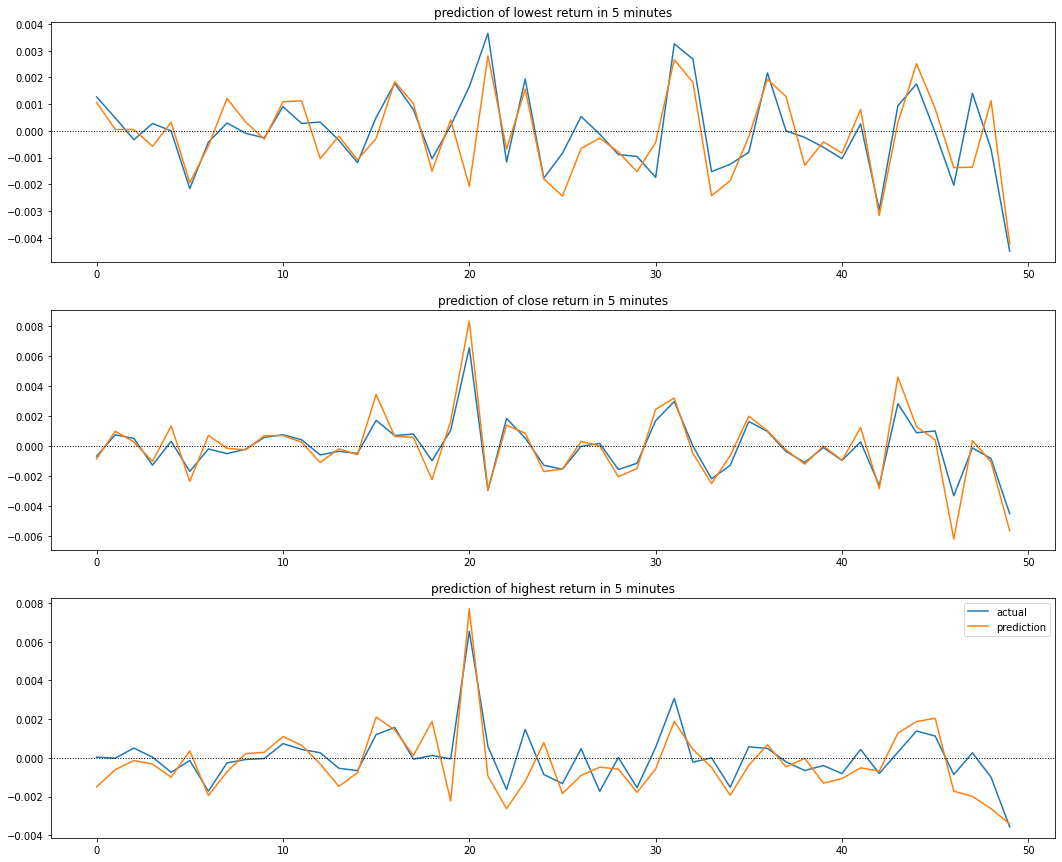

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

frm = 0
to = 50

fig = plt.figure(figsize = (18, 15))

ax1 = fig.add_subplot(311)
ax1.plot(test_labels.detach().numpy()[frm:to, 0], label = 'actual')
ax1.plot(pred[frm:to, 0], label = 'prediction')
ax1.axhline(y=0, color='black', linewidth=1, linestyle = ':')
ax1.title.set_text('prediction of lowest return in 5 minutes')

ax1 = fig.add_subplot(312)
ax1.plot(test_labels.detach().numpy()[frm:to, 1], label = 'actual')
ax1.plot(pred[frm:to, 1], label = 'prediction')
ax1.axhline(y=0, color='black', linewidth=1, linestyle = ':')
ax1.title.set_text('prediction of close return in 5 minutes')

ax1 = fig.add_subplot(313)
ax1.plot(test_labels.detach().numpy()[frm:to, 2], label = 'actual')
ax1.plot(pred[frm:to, 2], label = 'prediction')
ax1.axhline(y=0, color='black', linewidth=1, linestyle = ':')
ax1.title.set_text('prediction of highest return in 5 minutes')


plt.legend()
plt.show()